# EXPERIMENT 1 : Bayesian updating
## Single ChatGPT with 'private' information

In [1]:
# Bayesian updating
# Single ChatGPT with 'private' information

#Setup
import os
from openai import OpenAI  #(new code)
import time
import pandas as pd
import csv
#openai.api_key = '*******************'
client = OpenAI(api_key="******************************************",)

# Experiment setup
Color1="Red"
Color2="Green"
Color3="Yellow"
Mostly1="Mostly-Red"
Mostly2="Mostly-Green"
DrawNumbers = ["Draw 1","Draw 2","Draw 3","Draw 4","Draw 5","Draw 6","Draw 7","Draw 8","Draw 9","Draw 10","Draw 11","Draw 12","Draw 13","Draw 14","Draw 15","Draw 16","Draw 17","Draw 18","Draw 19","Draw 20"]

# Here, set the colors
DrawColors = [Color1,Color1,Color1,Color1,Color1,Color1,Color2,Color2,Color1,Color1,Color1,Color2,Color2,Color2,Color1,Color2,Color2,Color2,Color2,Color2]
#DrawColors = [Color2,Color1,Color1,Color1,Color2,Color1,Color2,Color2,Color2,Color1]
# split the initial prompt to post a contextual message
###"Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."

# build 'sections' variable (with 'session' and 'sub_session')
session=[]

# SET UP below the number of rounds (range(...n...)) from n=1 to N (nb: i= 0, 1, 2,...)
for i in range(10):
    print("Session: ", i)
    session.append(i)
    sub_session=[]
    
    

    ############################################################################################################
    ##################################### create_init_prompt function (i.e. System + First draw) ###############
    ############################################################################################################



        # Messages is a variable aimed at recording all prompts and responses
    messages = []
        #print(messages)
        # Variable recording all ouputs from ChatGPT
    completionS=[]
        # Variable extracting probabilities (e.g. 60 %) from ChatGPT responses
    percentages=[]
        # Variable extracting ratios (e.g. 2/3) from ChatGPT responses
    ratios=[]


        #Create system prompt
    messages.append({"role": "system", "content": f"""Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."""})


        # create_init_prompt function

    def create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        init_prompt = f"""Now, I would like to give me your estimate for what the probability of {Mostly1} is, given that I drew a {DrawColors[0]} marble ({DrawNumbers[0]}: {DrawColors[0]})? Please don't calculate anything—just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return init_prompt

        #print(init_prompt)
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    init_prompt=create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)

    messages.append({"role": "user", "content": init_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        #model="gpt-4-1106-preview",
        model="gpt-4o-mini",
        temperature=0.5,
        #frequency_penalty=0.6,
        #presence_penalty=0.8,
        #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    #Extract % with regular expression (re)




        # Append responses of ChatGPT to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumbers[0]}: {response_chatgpt}"""})

    sub_session.append(1)
        #print(response_chatgpt)
        #print(completion.choices[0].message.content)
        #print(completion.choices[0].message)
        #print(completion.choices[0])
        #print(completion.choices)
        #print(completion)
        
    time.sleep(10)


        #########################################################################################
        ######################################  Second prompt (Draw 2) ##########################
        #########################################################################################


        # create_second_prompt function
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):

        second_prompt = f"""{DrawNumbers[1]}: {DrawColors[1]} (recall; the first draw was {DrawColors[0]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return second_prompt


    second_prompt = create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        # Append to 'messages'
    messages.append({"role": "user", "content": second_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        #model="gpt-4-1106-preview",
        model="gpt-4o-mini",
        temperature=0.5,
        #frequency_penalty=0.6,
        #presence_penalty=0.8,
          #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    # Append to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
    #messages.append({"role": "assistant", "content": f"""{DrawNumbers[1]}: {response_chatgpt}"""})
    sub_session.append(2)
    
    time.sleep(5)

        #########################################################################################
        #################################### Next prompts #######################################
        #########################################################################################
# If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumber,DrawColors):
        # NB: here, 'DrawNumber' NOT 'DrawNumbers' due to the Loop 'for'
        prompt = f"""{DrawNumber}: {DrawColors[idx]} (recall; the sequence of previous draws is {DrawColors[:idx]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return prompt


    # Loop of prompts
    idx=2
    for DrawNumber in DrawNumbers[2:]:
        prompt = create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumber,DrawColors)
        messages.append({"role": "user", "content": prompt})
        completion = client.chat.completions.create(
            #model="gpt-3.5-turbo",
            #model="gpt-4-1106-preview",
            model="gpt-4o-mini",
            temperature=0.5,
            #frequency_penalty=0.6,
            #presence_penalty=0.8,
            #presence_penalty=0.5,
            max_tokens=100,
            messages=messages
            )
        response_chatgpt = completion.choices[0].message.content
        print(response_chatgpt)
        #NEW !
        #Record all outputs from ChatGPT
        completionS.append(completion)
        sub_session.append(idx+1)
        idx=idx+1
        time.sleep(5)
        messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumber}: {response_chatgpt}"""})
        

        #########################################################################################
        #################################### Pandas (Draws > 2) #################################
        #########################################################################################


    #role=[d.get('role') for d in messages]
    #content=[d.get('content') for d in messages] 
    #df = pd.DataFrame(list(zip(role,content)),columns =['role','content'])
    #df
    
    # Build Pandas data frame
    if i==0:
        
        # List variables
        user = [d.get('content') for d in messages if d['role']=='user']
        assistant = [d.get('content') for d in messages if d['role']=='assistant']
        created = [completion.created for completion in completionS]
        prompt_tokens=[completion.usage.prompt_tokens for completion in completionS]
        completion_tokens=[completion.usage.completion_tokens for completion in completionS]
        total_tokens=[completion.usage.total_tokens for completion in completionS]

        # Add constants

        model=[completion.model for completion in completionS]
        sections=[]
        for j in sub_session:
            sections.append(str(session[0])+"."+str(sub_session[j-1]))

        # Add list variables
        #df = pd.DataFrame(list(zip(session,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['session','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])
        df = pd.DataFrame(list(zip(sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['sections','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])

        # Print the data frame
    
    # Append records to Pandas data frame
    if i>0:
           
        user = []
        assistant = []
        created = []
        prompt_tokens = []
        completion_tokens = []
        total_tokens = []
        # Add constants
        model = []
        sections=[]

        user = [d.get('content') for d in messages if d['role']=='user']
        assistant = [d.get('content') for d in messages if d['role']=='assistant']
        created = [completion.created for completion in completionS]
        prompt_tokens=[completion.usage.prompt_tokens for completion in completionS]
        completion_tokens=[completion.usage.completion_tokens for completion in completionS]
        total_tokens=[completion.usage.total_tokens for completion in completionS]

        # Add constants

        model=[completion.model for completion in completionS]
        for j in sub_session:
            sections.append(str(session[i])+"."+str(sub_session[j-1]))
        
        df2 = pd.DataFrame(list(zip(sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['sections','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])
        df = pd.concat([df, df2])

# Save to CSV format 

df.to_csv(r'C:\Users\FLG\Documents\ChatGPTExperiments\BayesianChatGPT4o_03102024_frequency_penaltyNONE_presence_penaltyNONE_temperature05.csv', sep='#', index = False)


    




Session:  0
My best guess for the probability of the Mostly-Red bag, given that you drew a Red marble, is around 70%.
My best guess for the probability of the Mostly-Red bag, given that you drew two Red marbles, is around 85%.
My best guess for the probability of the Mostly-Red bag, given that you drew three Red marbles, is around 90%.
My best guess for the probability of the Mostly-Red bag, given that you drew four Red marbles, is around 95%.
My best guess for the probability of the Mostly-Red bag, given that you drew five Red marbles, is around 98%.
My best guess for the probability of the Mostly-Red bag, given that you drew six Red marbles, is around 99%.
My best guess for the probability of the Mostly-Red bag, given that you drew six Red marbles followed by one Green marble, is around 85%.
My best guess for the probability of the Mostly-Red bag, given that you drew six Red marbles followed by two Green marbles, is around 70%.
My best guess for the probability of the Mostly-Red bag,

In [2]:
df

,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens
0,0.1,1727948328,gpt-4o-mini-2024-07-18,Red,"Now, I would like to give me your estimate for...",My best guess for the probability of the Mostl...,271,26,297
1,0.2,1727948339,gpt-4o-mini-2024-07-18,Red,Draw 2: Red (recall; the first draw was Red). ...,My best guess for the probability of the Mostl...,361,27,388
2,0.3,1727948345,gpt-4o-mini-2024-07-18,Red,Draw 3: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,458,27,485
3,0.4,1727948352,gpt-4o-mini-2024-07-18,Red,Draw 4: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,558,27,585
4,0.5,1727948359,gpt-4o-mini-2024-07-18,Red,Draw 5: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,661,27,688
...,...,...,...,...,...,...,...,...,...
15,9.16,1727949613,gpt-4o-mini-2024-07-18,Green,Draw 16: Green (recall; the sequence of previo...,I would guess around 70%.,1693,7,1700
16,9.17,1727949620,gpt-4o-mini-2024-07-18,Green,Draw 17: Green (recall; the sequence of previo...,I would guess around 65%.,1812,7,1819
17,9.18,1727949626,gpt-4o-mini-2024-07-18,Green,Draw 18: Green (recall; the sequence of previo...,I would guess around 60%.,1934,7,1941
18,9.19,1727949632,gpt-4o-mini-2024-07-18,Green,Draw 19: Green (recall; the sequence of previo...,I would guess around 55%.,2059,7,2066


In [3]:
import re
# Extract with Regular Expression
df['Estimate'] = df['assistant'].str.extract(r'(\d+(?:\.\d+)?%)', expand=False)

In [4]:
df

,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens,Estimate
0,0.1,1727948328,gpt-4o-mini-2024-07-18,Red,"Now, I would like to give me your estimate for...",My best guess for the probability of the Mostl...,271,26,297,70%
1,0.2,1727948339,gpt-4o-mini-2024-07-18,Red,Draw 2: Red (recall; the first draw was Red). ...,My best guess for the probability of the Mostl...,361,27,388,85%
2,0.3,1727948345,gpt-4o-mini-2024-07-18,Red,Draw 3: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,458,27,485,90%
3,0.4,1727948352,gpt-4o-mini-2024-07-18,Red,Draw 4: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,558,27,585,95%
4,0.5,1727948359,gpt-4o-mini-2024-07-18,Red,Draw 5: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,661,27,688,98%
...,...,...,...,...,...,...,...,...,...,...
15,9.16,1727949613,gpt-4o-mini-2024-07-18,Green,Draw 16: Green (recall; the sequence of previo...,I would guess around 70%.,1693,7,1700,70%
16,9.17,1727949620,gpt-4o-mini-2024-07-18,Green,Draw 17: Green (recall; the sequence of previo...,I would guess around 65%.,1812,7,1819,65%
17,9.18,1727949626,gpt-4o-mini-2024-07-18,Green,Draw 18: Green (recall; the sequence of previo...,I would guess around 60%.,1934,7,1941,60%
18,9.19,1727949632,gpt-4o-mini-2024-07-18,Green,Draw 19: Green (recall; the sequence of previo...,I would guess around 55%.,2059,7,2066,55%


In [5]:
# Convert string to numeric values
df['sections'] = df['sections'].astype(str)
# Split the values into two columns based on the decimal point
df[['session', 'sub_session']] = df['sections'].str.split('.', expand=True)
# Convert the columns to numeric 
df['session'] = pd.to_numeric(df['session'])
df['sub_session'] = pd.to_numeric(df['sub_session'])
df

,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens,Estimate,session,sub_session
0,0.1,1727948328,gpt-4o-mini-2024-07-18,Red,"Now, I would like to give me your estimate for...",My best guess for the probability of the Mostl...,271,26,297,70%,0,1
1,0.2,1727948339,gpt-4o-mini-2024-07-18,Red,Draw 2: Red (recall; the first draw was Red). ...,My best guess for the probability of the Mostl...,361,27,388,85%,0,2
2,0.3,1727948345,gpt-4o-mini-2024-07-18,Red,Draw 3: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,458,27,485,90%,0,3
3,0.4,1727948352,gpt-4o-mini-2024-07-18,Red,Draw 4: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,558,27,585,95%,0,4
4,0.5,1727948359,gpt-4o-mini-2024-07-18,Red,Draw 5: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,661,27,688,98%,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15,9.16,1727949613,gpt-4o-mini-2024-07-18,Green,Draw 16: Green (recall; the sequence of previo...,I would guess around 70%.,1693,7,1700,70%,9,16
16,9.17,1727949620,gpt-4o-mini-2024-07-18,Green,Draw 17: Green (recall; the sequence of previo...,I would guess around 65%.,1812,7,1819,65%,9,17
17,9.18,1727949626,gpt-4o-mini-2024-07-18,Green,Draw 18: Green (recall; the sequence of previo...,I would guess around 60%.,1934,7,1941,60%,9,18
18,9.19,1727949632,gpt-4o-mini-2024-07-18,Green,Draw 19: Green (recall; the sequence of previo...,I would guess around 55%.,2059,7,2066,55%,9,19


In [6]:
#Shape data to calculate Bayes' rule (posterior probability of Red)
df['red'] = df.groupby('session')['DrawColors'].transform(lambda x: x.eq('Red').cumsum())
df['green'] = df.groupby('session')['DrawColors'].transform(lambda x: x.eq('Green').cumsum())
df[['session','sub_session','DrawColors','red','green']].head(50)

,session,sub_session,DrawColors,red,green
0,0,1,Red,1,0
1,0,2,Red,2,0
2,0,3,Red,3,0
3,0,4,Red,4,0
4,0,5,Red,5,0
5,0,6,Red,6,0
6,0,7,Green,6,1
7,0,8,Green,6,2
8,0,9,Red,7,2
9,0,10,Red,8,2


In [8]:



# Define the function for the formula calculation
def calculate_posterior_prob(row):
    return (2**row['red'] / (2**row['red'] + 2**row['green']))*100

# Apply the function to each row of the DataFrame
df['theoritical_posterior_prob'] = df.apply(lambda row: calculate_posterior_prob(row), axis=1)

# from string var to numeric var
df['ChatGPT_posterior_prob'] = pd.to_numeric(df['Estimate'].str.replace('%', ''))

# dif between theoritical_posterior_prob and ChatGPT_posterior_prob
def diff_posterior_prob(row):
    return (row['theoritical_posterior_prob'] - row['ChatGPT_posterior_prob'])
df['diff_posterior_prob'] = df.apply(lambda row: diff_posterior_prob(row), axis=1)

# Display the resulting DataFrame
#df[['sections','DrawColors','red','green','theoritical_posterior_prob','Estimate','ChatGPT_posterior_prob','diff_posterior_prob']].head(5)
df.head(3)

,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens,Estimate,session,sub_session,red,green,theoritical_posterior_prob,ChatGPT_posterior_prob,diff_posterior_prob
0,0.1,1727948328,gpt-4o-mini-2024-07-18,Red,"Now, I would like to give me your estimate for...",My best guess for the probability of the Mostl...,271,26,297,70%,0,1,1,0,66.666667,70,-3.333333
1,0.2,1727948339,gpt-4o-mini-2024-07-18,Red,Draw 2: Red (recall; the first draw was Red). ...,My best guess for the probability of the Mostl...,361,27,388,85%,0,2,2,0,80.000000,85,-5.000000
2,0.3,1727948345,gpt-4o-mini-2024-07-18,Red,Draw 3: Red (recall; the sequence of previous ...,My best guess for the probability of the Mostl...,458,27,485,90%,0,3,3,0,88.888889,90,-1.111111


In [9]:
# SET initial conditions
# !!!!!!!! SET L == nbr of rounds
L=10
for k in range(L):
    data = []

# always inserting new rows at the first position - last row will be always on top  
    initialcondition= str(k)+".0"
    data.insert(0, {'sections':initialcondition,'created':'.','model':model[0],'DrawColors':'.','user':'.','assistant':'.','prompt_tokens':'.','completion_tokens':'.','total_tokens':'.','Estimate':'.','session':k,'sub_session':0,'red':'.','green':'.','theoritical_posterior_prob':50,'ChatGPT_posterior_prob':50,'diff_posterior_prob':0})

# Concatanating original dataframe with additional row of data from list

    pd.concat([pd.DataFrame(data), df], ignore_index=True) # does not save changes to the original dataframe

# Saving modified df as df2

    df = pd.concat([pd.DataFrame(data), df], ignore_index=True)

df

,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens,Estimate,session,sub_session,red,green,theoritical_posterior_prob,ChatGPT_posterior_prob,diff_posterior_prob
0,9.0,.,gpt-4o-mini-2024-07-18,.,.,.,.,.,.,.,9,0,.,.,50.000000,50,0.000000
1,8.0,.,gpt-4o-mini-2024-07-18,.,.,.,.,.,.,.,8,0,.,.,50.000000,50,0.000000
2,7.0,.,gpt-4o-mini-2024-07-18,.,.,.,.,.,.,.,7,0,.,.,50.000000,50,0.000000
3,6.0,.,gpt-4o-mini-2024-07-18,.,.,.,.,.,.,.,6,0,.,.,50.000000,50,0.000000
4,5.0,.,gpt-4o-mini-2024-07-18,.,.,.,.,.,.,.,5,0,.,.,50.000000,50,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,9.16,1727949613,gpt-4o-mini-2024-07-18,Green,Draw 16: Green (recall; the sequence of previo...,I would guess around 70%.,1693,7,1700,70%,9,16,10,6,94.117647,70,24.117647
206,9.17,1727949620,gpt-4o-mini-2024-07-18,Green,Draw 17: Green (recall; the sequence of previo...,I would guess around 65%.,1812,7,1819,65%,9,17,10,7,88.888889,65,23.888889
207,9.18,1727949626,gpt-4o-mini-2024-07-18,Green,Draw 18: Green (recall; the sequence of previo...,I would guess around 60%.,1934,7,1941,60%,9,18,10,8,80.000000,60,20.000000
208,9.19,1727949632,gpt-4o-mini-2024-07-18,Green,Draw 19: Green (recall; the sequence of previo...,I would guess around 55%.,2059,7,2066,55%,9,19,10,9,66.666667,55,11.666667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


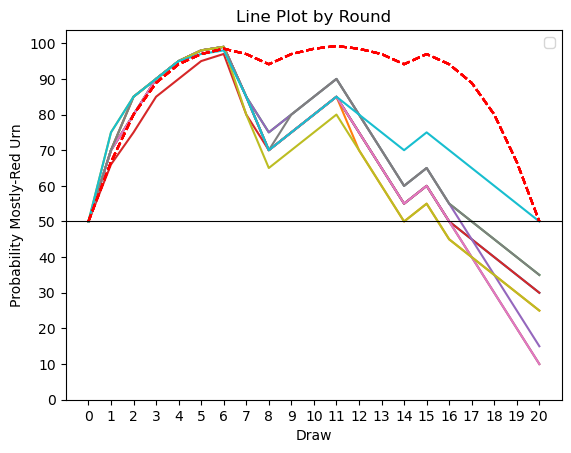

In [19]:
# Draw Graphic
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()

# Group by 'Group' and plot each line
for group, group_data in df.groupby('session'):
    group_data.plot(x='sub_session', y='ChatGPT_posterior_prob', label='', xticks=(range(0, 21)), ax=ax)
    
for group, group_data in df.groupby('session'):
    group_data.plot(x='sub_session', y='theoritical_posterior_prob', label='', color="red", xticks=(range(0, 21)), linestyle='dashed', ax=ax)

# Set labels and title
plt.xlabel('Draw')
plt.ylabel('Probability Mostly-Red Urn')
plt.title('Line Plot by Round')
plt.yticks((0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100))
plt.axhline(50, color='black', linewidth=0.8)  # Ligne horizontale pour l'axe X

# Show the legend
plt.legend()

# Show the plot
#plt.show()
plt.draw()
#plt.savefig("C:\\Users\\FLG\\Documents\\ChatGPTExperiments\\BayesianChatGPT4o_03102024_frequency_penaltyNONE_presence_penaltyNONE_temperature05.png")
#df.to_csv(r'C:\Users\FLG\Documents\ChatGPTExperiments\BayesianChatGPT4o_03102024_frequency_penaltyNONE_presence_penaltyNONE_temperature05.csv', sep='#', index = False)


# EXPERIMENT 2 : Information Cascades
## Single ChatGPT with 'private' and 'public' information
### With Autogen and images for instructions (https://veconlab.econ.virginia.edu/cas/cas.php)

In [24]:
# EXPERIMENT 2 : Information Cascades
## Single ChatGPT with 'private' and 'public' information
### With Autogen and images for instructions (https://veconlab.econ.virginia.edu/cas/cas.php)

import autogen

config_list_4v = autogen.config_list_from_json(
    "OAI_CONFIG_LIST2.json",
)

config_list_gpt4 = autogen.config_list_from_json(
    "OAI_CONFIG_LIST1.json",
)

gpt4_llm_config = {"config_list": config_list_gpt4}

from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent

# Test if the game rule has been well understood.
prompt0 = """Look at these images and respond to the two questions presented in the last image.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""

########################################################
######### Game with 6 Players  #########################
########################################################

prompt1b = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the first one to make a prediction. Your private draw is ‘B’ (Blue marble). Could you indicate the cup that you think is being used ? Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""
prompt2Br = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the second one to make a prediction. The prediction of your predecessor is Blue cup. Your private draw is ‘R’ (Red marble). Could you indicate the cup that you think is being used ? Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""
prompt3BRb = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the third one to make a prediction. The predictions of your two predecessors were Blue cup for the first predecessor and Red cup for the second predecessor. Your private draw is ‘B’ (Blue marble). Could you indicate the cup that you think is being used ? Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""
prompt4BRBb = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the fourth one to make a prediction. The predictions of your three predecessors were Blue cup for the first predecessor and Red cup for the second predecessor and Blue cup for the third predecessor. Your private draw is ‘B’ (Blue marble). Could you indicate the cup that you think is being used ? Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""
prompt5BRBBb = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the fifth one to make a prediction. The predictions of your four predecessors were Blue cup for the first predecessor and Red cup for the second predecessor and Blue cup for the third predecessor and Blue cup for the fourth predecessor. Your private draw is ‘B’ (Blue marble). Could you indicate the cup that you think is being used ? Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""

prompt6BRBBBb = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the sixth one to make a prediction. The predictions of your five predecessors were Blue cup for the first predecessor and Red cup for the second predecessor and Blue cup for the third predecessor and Blue cup for the fourth predecessor and Blue cup for the fifth predecessor. Your private draw is ‘B’ (Blue marble). Could you indicate the cup that you think is being used ? Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""

########################################################
######### Other scenarios  + probabilities #############
########################################################


promptRRRRRb = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the sixth one to make a prediction. The predictions of your five predecessors were Red cup for the first predecessor and Red cup for the second predecessor and Red cup for the third predecessor and Red cup for the fourth predecessor and Red cup for the fifth predecessor. Your private draw is ‘B’ (Blue marble). Could you indicate the cup that you think is being used ? Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""

promptRRRRRbp = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the sixth one to make a prediction. The predictions of your five predecessors were Red cup for the first predecessor and Red cup for the second predecessor and Red cup for the third predecessor and Red cup for the fourth predecessor and Red cup for the fifth predecessor. Your private draw is ‘B’ (Blue marble). Now I want you to give me your estimate for what the probability of Mostly-Red cup is at this stage ? Please don't calculate anything—just give me your best guess or hunch at the probability. Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""

promptRRRbp = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the fourth one to make a prediction. The predictions of your three predecessors were Red cup for the first predecessor and Red cup for the second predecessor and Red cup for the third predecessor. Your private draw is ‘B’ (Blue marble). First, could you indicate the cup that you think is being used ? Second, I want you to give me your estimate for what the probability of Mostly-Red cup is at this stage ? Please don't calculate anything—just give me your best guess or hunch at the probability. Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""

promptRRRb = """Look at these images. You have been assigned to a group of size 6. Out of 6, you are the fourth one to make a prediction. The predictions of your three predecessors were Red cup for the first predecessor and Red cup for the second predecessor and Red cup for the third predecessor. Your private draw is ‘B’ (Blue marble). Could you indicate the cup that you think is being used ? Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""

promptRRRRRBBBBbp = """Look at these images. You have been assigned to a group of size 10. Out of 10, you are the tenth one to make a prediction. The predictions of your nine predecessors were Red cup for the first predecessor and Red cup for the second predecessor and Red cup for the third predecessor and Red cup for the fourth predecessor and Red cup for the fifth predecessor and Blue cup for the sixth predecessor and Blue cup for the seventh predecessor and Blue cup for the eighth predecessor and Blue cup for the ninth predecessor. Your private draw is ‘blue’ (blue marble). First, could you indicate the cup that you think is being used ? Second, I want you to give me your estimate for what the probability of Mostly-Red cup is at this stage ? Please don't calculate anything—just give me your best guess or hunch at the probability. Please provide a short answer.
<img image1.png>
<img image2.png>
<img image3.png>
<img image4.png>
<img image6.png>
"""

########################################################
######### Setting the temperature parameter ############
########################################################

image_agent = MultimodalConversableAgent(
    name="image-explainer",
    max_consecutive_auto_reply=1,
    llm_config={"config_list": config_list_4v, "temperature": 0.95, "max_tokens": 300},
)

user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    human_input_mode="NEVER",  # Try between ALWAYS or NEVER
    max_consecutive_auto_reply=0,
    code_execution_config={
        "use_docker": False
    },
)

# Ask the question with an image
user_proxy.initiate_chat(
    image_agent,
    message=promptRRRbp,
)

User_proxy (to image-explainer):

Look at these images. You have been assigned to a group of size 6. Out of 6, you are the fourth one to make a prediction. The predictions of your three predecessors were Red cup for the first predecessor and Red cup for the second predecessor and Red cup for the third predecessor. Your private draw is ‘B’ (Blue marble). First, could you indicate the cup that you think is being used ? Second, I want you to give me your estimate for what the probability of Mostly-Red cup is at this stage ? Please don't calculate anything—just give me your best guess or hunch at the probability. Please provide a short answer.
<image>
<image>
<image>
<image>
<image>


--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

Given the information provided:

1. **Cup Prediction**: I would predict the **Red cup**.
2. **Probability Estimate for Mostly-Red Cup**: My best guess for the probab

ChatResult(chat_id=None, chat_history=[{'content': "Look at these images. You have been assigned to a group of size 6. Out of 6, you are the fourth one to make a prediction. The predictions of your three predecessors were Red cup for the first predecessor and Red cup for the second predecessor and Red cup for the third predecessor. Your private draw is ‘B’ (Blue marble). First, could you indicate the cup that you think is being used ? Second, I want you to give me your estimate for what the probability of Mostly-Red cup is at this stage ? Please don't calculate anything—just give me your best guess or hunch at the probability. Please provide a short answer.\n<img image1.png>\n<img image2.png>\n<img image3.png>\n<img image4.png>\n<img image6.png>\n", 'role': 'assistant', 'name': 'User_proxy'}, {'content': 'Given the information provided:\n\n1. **Cup Prediction**: I would predict the **Red cup**.\n2. **Probability Estimate for Mostly-Red Cup**: My best guess for the probability of the cu